# Running MTCNN

In [1]:
from mtcnn import MTCNN
import cv2

image_path = 'ivan.jpg'
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detections = detector.detect_faces(img)
detections

[{'box': [277, 93, 49, 62],
  'confidence': 0.9999747276306152,
  'keypoints': {'left_eye': (291, 117),
   'right_eye': (314, 115),
   'nose': (304, 130),
   'mouth_left': (296, 143),
   'mouth_right': (313, 142)}},
 {'box': [307, 173, 37, 55],
  'confidence': 0.8657229542732239,
  'keypoints': {'left_eye': (327, 194),
   'right_eye': (339, 191),
   'nose': (341, 199),
   'mouth_left': (334, 215),
   'mouth_right': (342, 213)}}]

Filtering detections with confidence greater than the confidence threshold and plotting detections

(-0.5, 560.5, 560.5, -0.5)

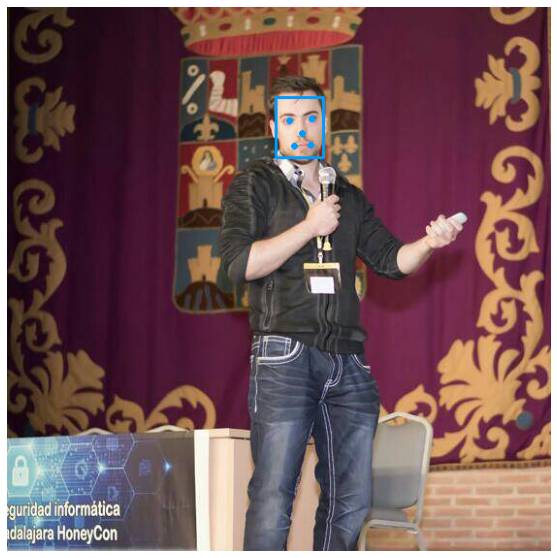

In [2]:
import matplotlib.pyplot as plt

img_with_dets = img.copy()
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img_with_dets, (x,y), (x+width,y+height), (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_right']), 2, (0,155,255), 2)
plt.figure(figsize = (10,10))
plt.imshow(img_with_dets)
plt.axis('off')